# First SVM algorithm to detect brake action

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

Load data

In [34]:
brake_train_df = pd.read_csv('./data/smartphone_frenada repentina_02-Feb-2022-Mv2GkS5qm4edjQ9DFUt.csv')
brake_train_df.head()

,id,accX,accY,accZ,eventClass,idTrip,idVehicle,latitude,longitude,magX,magY,magZ,route,speed,timestamp,velAngX,velAngY,velAngZ
0,34214,-0.927219,4.000800,9.346664,0,10,Nissan March (Xiaomi Redmi Note 9S),0.833369,-77.650155,5.21250,27.093752,20.962502,Frenada repentina,15.384299,2022-02-02 20:07:06.490000-05:00,-0.021571,-0.035818,0.029827
1,34215,0.167198,3.923930,8.980562,0,10,Nissan March (Xiaomi Redmi Note 9S),0.833369,-77.650155,5.11875,26.906252,21.262501,Frenada repentina,15.384299,2022-02-02 20:07:06.538000-05:00,-0.028761,0.026764,0.018375
2,34216,0.227318,4.204788,9.037991,0,10,Nissan March (Xiaomi Redmi Note 9S),0.833369,-77.650155,5.21250,26.681252,21.356251,Frenada repentina,15.384299,2022-02-02 20:07:06.589000-05:00,-0.021305,-0.029827,0.025832
3,34217,-0.554537,3.954738,8.303095,0,10,Nissan March (Xiaomi Redmi Note 9S),0.833369,-77.650155,5.32500,26.587502,21.300001,Frenada repentina,15.384299,2022-02-02 20:07:06.638000-05:00,-0.027563,-0.028362,-0.002264
4,34218,0.192323,3.583850,9.022138,0,10,Nissan March (Xiaomi Redmi Note 9S),0.833369,-77.650155,5.38125,26.793751,21.187500,Frenada repentina,15.384299,2022-02-02 20:07:06.689000-05:00,-0.020905,-0.046471,0.001065


Plot data

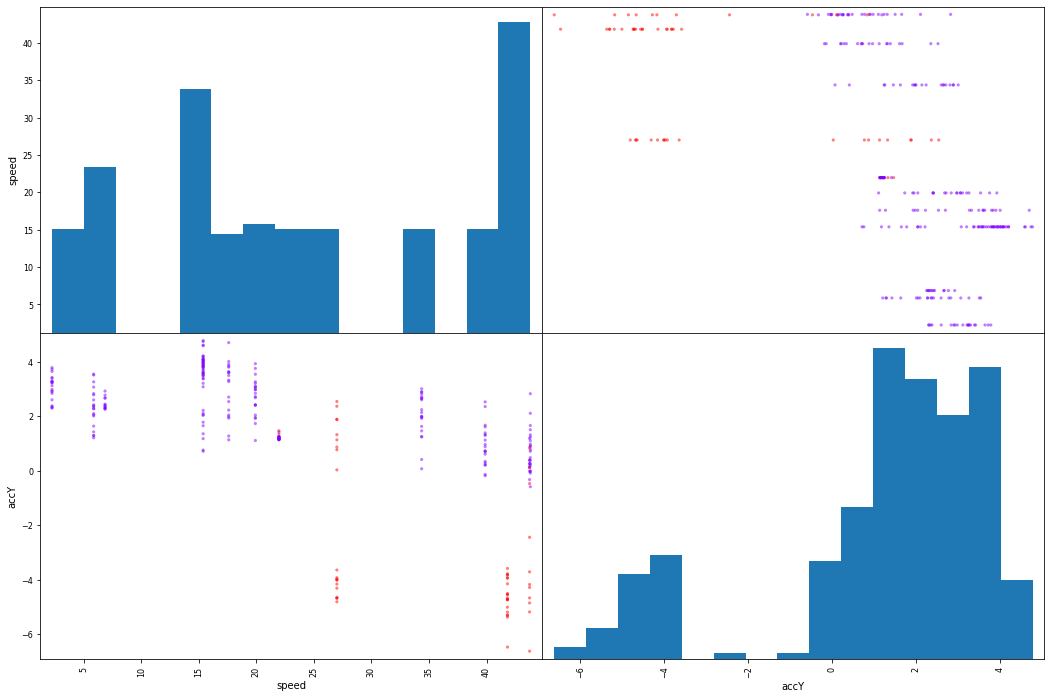

In [35]:
from matplotlib import cm
X = brake_train_df[['speed', 'accY']]
y = brake_train_df['eventClass']
cmap = cm.get_cmap('rainbow')
scatter = pd.plotting.scatter_matrix(X, c= y, marker = 'o', s=10, hist_kwds={'bins':15}, figsize=(18,12), cmap=cmap)

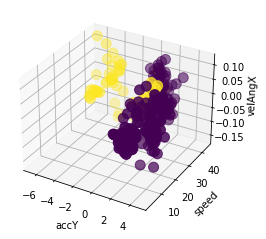

In [4]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['accY'], X['speed'], X['velAngX'], c = y, marker = 'o', s=100)
ax.set_xlabel('accY')
ax.set_ylabel('speed')
ax.set_zlabel('velAngX')
plt.show()

In [43]:
brake_test_df = pd.read_csv('./data/smartphone_frenada repentina_02-Feb-2022-Mv2GBn8gMBZPF-trJkU.csv')
X_test = brake_test_df[['speed', 'accY']]
y_test = brake_test_df['eventClass']

brake_test_df.head()

,id,accX,accY,accZ,eventClass,idTrip,idVehicle,latitude,longitude,magX,magY,magZ,route,speed,timestamp,velAngX,velAngY,velAngZ
0,33583,0.395713,1.370489,9.673882,0,9,Nissan March (Xiaomi Redmi Note 9S),0.833758,-77.650044,18.150002,-34.518753,54.206253,Frenada repentina,2.586201,2022-02-02 20:05:45.062000-05:00,0.000533,-0.001731,-0.000533
1,33584,0.414257,1.340579,9.699606,0,9,Nissan March (Xiaomi Redmi Note 9S),0.833758,-77.650044,18.150002,-34.462502,54.281254,Frenada repentina,2.586201,2022-02-02 20:05:45.110000-05:00,0.000533,0.000133,-0.000533
2,33585,0.414257,1.340579,9.699606,0,9,Nissan March (Xiaomi Redmi Note 9S),0.833758,-77.650044,18.168751,-34.425003,54.487503,Frenada repentina,2.586201,2022-02-02 20:05:45.160000-05:00,0.000533,0.000133,-0.000533
3,33586,0.404088,1.365704,9.676275,0,9,Nissan March (Xiaomi Redmi Note 9S),0.833758,-77.650044,18.318750,-34.256252,54.450001,Frenada repentina,2.586201,2022-02-02 20:05:45.211000-05:00,0.000000,-0.001065,-0.000133
4,33587,0.428614,1.321436,9.673882,0,9,Nissan March (Xiaomi Redmi Note 9S),0.833758,-77.650044,18.300001,-34.181252,54.318752,Frenada repentina,2.586201,2022-02-02 20:05:45.260000-05:00,-0.000266,0.000666,-0.000399


In [37]:
from sklearn import svm
clf = svm.SVC(C=1.0, kernel='rbf')
clf.fit(X,y)

SVC()

In [44]:
clf.score(X_test, y_test)

0.93026941362916

In [32]:
test_data = brake_train_df[brake_train_df['eventClass'] == 1]
test_data = test_data[['speed', 'accY']]
test_data

,speed,accY
156,43.740639,0.103789
157,43.740639,0.836591
158,43.740639,-0.471386
159,43.740639,-3.712464
160,43.740639,-4.669294
161,43.740639,-2.445166
162,43.740639,-4.283751
163,43.740639,-4.176971
164,43.740639,-5.183153
165,43.740639,-4.853841


In [48]:
test_data = brake_test_df[brake_test_df['eventClass'] == 0]
test_data = test_data[['speed', 'accY']]
test_data

,speed,accY
0,2.586201,1.370489
1,2.586201,1.340579
2,2.586201,1.340579
3,2.586201,1.365704
4,2.586201,1.321436
...,...,...
626,15.384299,1.198505
627,15.384299,1.289432
628,15.384299,1.090529
629,15.384299,0.819841


In [49]:
clf.predict(test_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

TypeError: '(slice(None, None, None), 0)' is an invalid key

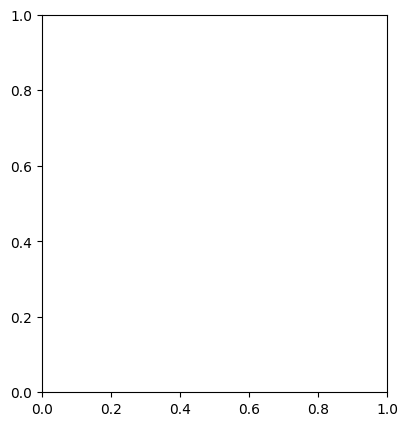

In [51]:
plot_mushroom_boundary(X_test, y_test, clf)